# Imports


In [1]:
import pandas as pd
import os
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

from sklearn.model_selection import cross_val_score

# Read data

In [2]:
# import opendatasets as od
# dataset = 'https://www.kaggle.com/competitions/child-mind-institute-problematic-internet-use/data'
# od.download(dataset)

In [3]:
# df = pd.read_csv("/home/ku18/CS412/dataset/train.csv")
# df.columns
import pandas as pd

df = pd.read_csv("./child-mind-institute-problematic-internet-use/train.csv")
df.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [4]:
TARGET_COLS = [
    # "PCIAT-PCIAT_01",
    # "PCIAT-PCIAT_02",
    # "PCIAT-PCIAT_03",
    # "PCIAT-PCIAT_04",
    # "PCIAT-PCIAT_05",
    # "PCIAT-PCIAT_06",
    # "PCIAT-PCIAT_07",
    # "PCIAT-PCIAT_08",
    # "PCIAT-PCIAT_09",
    # "PCIAT-PCIAT_10",
    # "PCIAT-PCIAT_11",
    # "PCIAT-PCIAT_12",
    # "PCIAT-PCIAT_13",
    # "PCIAT-PCIAT_14",
    # "PCIAT-PCIAT_15",
    # "PCIAT-PCIAT_16",
    # "PCIAT-PCIAT_17",
    # "PCIAT-PCIAT_18",
    # "PCIAT-PCIAT_19",
    # "PCIAT-PCIAT_20",
    # "PCIAT-PCIAT_Total",
    "sii"
]

FEATURE_COLS = [
    "Basic_Demos-Age",
    "Basic_Demos-Sex",
    "CGAS-CGAS_Score",
    "Physical-BMI",
    "Physical-Height",
    "Physical-Weight",
    "Physical-Waist_Circumference",
    "Physical-Diastolic_BP",
    "Physical-HeartRate",
    "Physical-Systolic_BP",
    "Fitness_Endurance-Max_Stage",
    "Fitness_Endurance-Time_Mins",
    "Fitness_Endurance-Time_Sec",
    "FGC-FGC_CU",
    "FGC-FGC_CU_Zone",
    "FGC-FGC_GSND",
    "FGC-FGC_GSND_Zone",
    "FGC-FGC_GSD",
    "FGC-FGC_GSD_Zone",
    "FGC-FGC_PU",
    "FGC-FGC_PU_Zone",
    "FGC-FGC_SRL",
    "FGC-FGC_SRL_Zone",
    "FGC-FGC_SRR",
    "FGC-FGC_SRR_Zone",
    "FGC-FGC_TL",
    "FGC-FGC_TL_Zone",
    "BIA-BIA_Activity_Level_num",
    "BIA-BIA_BMC",
    "BIA-BIA_BMI",
    "BIA-BIA_BMR",
    "BIA-BIA_DEE",
    "BIA-BIA_ECW",
    "BIA-BIA_FFM",
    "BIA-BIA_FFMI",
    "BIA-BIA_FMI",
    "BIA-BIA_Fat",
    "BIA-BIA_Frame_num",
    "BIA-BIA_ICW",
    "BIA-BIA_LDM",
    "BIA-BIA_LST",
    "BIA-BIA_SMM",
    "BIA-BIA_TBW",
    "PAQ_A-PAQ_A_Total",
    "PAQ_C-PAQ_C_Total",
    "SDS-SDS_Total_Raw",
    "SDS-SDS_Total_T",
    "PreInt_EduHx-computerinternet_hoursday",
]
data = df[FEATURE_COLS]
target = df[TARGET_COLS]

In [5]:
len(data)

3960

# Missing values in data

In [6]:
print(data.isna().sum())

Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-CGAS_Score                           1539
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            884
Physical-Waist_Circumference              3062
Physical-Diastolic_BP                     1006
Physical-HeartRate                         993
Physical-Systolic_BP                      1006
Fitness_Endurance-Max_Stage               3217
Fitness_Endurance-Time_Mins               3220
Fitness_Endurance-Time_Sec                3220
FGC-FGC_CU                                1638
FGC-FGC_CU_Zone                           1678
FGC-FGC_GSND                              2886
FGC-FGC_GSND_Zone                         2898
FGC-FGC_GSD                               2886
FGC-FGC_GSD_Zone                          2897
FGC-FGC_PU                                1650
FGC-FGC_PU_Zone                           1689
FGC-FGC_SRL  

## Using iterative imputation to fill in missing values in the dataset|

In [7]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

data = pd.DataFrame(iterative_imputer.fit_transform(data))
data.columns = FEATURE_COLS

# Missing values in target

In [8]:
# print(target.isna().sum())

## drop missing target values

In [9]:
df = pd.concat([data, target], axis = 1)

In [10]:
df = df.dropna()

In [11]:
print(len(df))

2736


# Classification models

In [12]:
X = df[FEATURE_COLS]
y = df[TARGET_COLS]
y = y.values.flatten()
print(len(X))
print(len(y))

2736
2736


## Classifiers

In [13]:
# create the model: Random Forest
myRF = RandomForestClassifier(max_depth=15, random_state=0, n_estimators=100)

# Perform k-fold cross-validation
accuracyRF = cross_val_score(myRF,X,y,cv=10)

# report accuracy in each fold, and mean accuracy
print(accuracyRF)
print(np.mean(accuracyRF))

[0.59124088 0.57664234 0.60583942 0.59489051 0.62043796 0.59854015
 0.60805861 0.62637363 0.59340659 0.58608059]
0.6001510654795326


In [14]:
# create the model: XGBoost
myXGB = XGBClassifier(max_depth=15)

# Perform k-fold cross-validation
accuracyXGB = cross_val_score(myXGB,X,y,cv=10)

# report accuracy in each fold, and mean accuracy
print(accuracyXGB)
print(np.mean(accuracyXGB))

[0.60218978 0.53649635 0.5620438  0.58394161 0.61678832 0.57664234
 0.58974359 0.63369963 0.57142857 0.6043956 ]
0.587736958904842


In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

mySVC = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
accuracySVC = cross_val_score(mySVC,X,y,cv=10)
print(accuracySVC)
print(np.mean(accuracySVC))

[0.60948905 0.5729927  0.60583942 0.58394161 0.59124088 0.58759124
 0.57875458 0.5970696  0.57875458 0.59340659]
0.5899080238496296


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4648 - loss: 0.0000e+00 - val_accuracy: 0.5639 - val_loss: 0.0000e+00
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5845 - loss: 0.0000e+00 - val_accuracy: 0.5639 - val_loss: 0.0000e+00
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5902 - loss: 0.0000e+00 - val_accuracy: 0.5639 - val_loss: 0.0000e+00
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5714 - loss: 0.0000e+00 - val_accuracy: 0.5639 - val_loss: 0.0000e+00
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5728 - loss: 0.0000e+00 - val_accuracy: 0.5639 - val_loss: 0.0000e+00
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5819 - loss: 0.0000e+00 - val_accuracy: 0.5639 - val_loss: 0.0000e+00
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5909 - loss: 0.0000e+00 - val_accuracy: 0.5639 - val_loss: 0.0000e+00
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5874 - lo

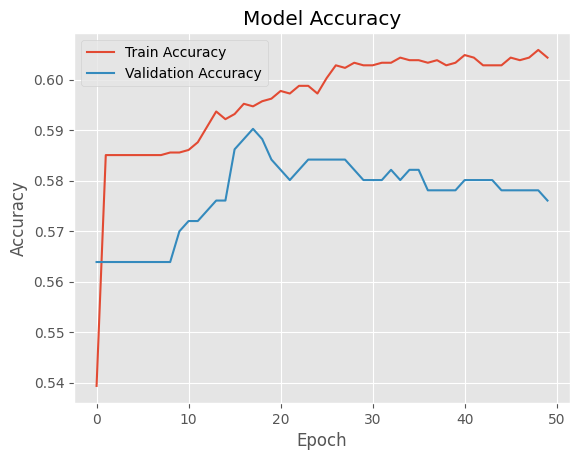

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Example data setup (replace with your actual data)
# X = pd.DataFrame(...)  # Your feature matrix
# y = pd.Series(...)     # Your target variable

# Preprocess the data
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the FFN model
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)) )  # Input layer
model.add(layers.Dense(64, activation='relu'))         # First hidden layer
model.add(layers.Dense(64, activation='relu'))         # Second hidden layer
model.add(layers.Dense(1, activation='sigmoid'))       # Output layer for binary classification
# For multi-class classification, use:
# model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])
 
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Optionally, plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save('./model.keras')
# To load the model:
#keras.models.load_model('./model.keras')


In [29]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42, scoring='neg_mean_squared_log_error')

# Access feature importances
importances = result.importances_mean

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 

In [39]:
print(importances[importances > 0], importances.shape)

[0.00273655 0.00231271 0.00040884 0.00122504 0.00011315 0.00096224
 0.00045022 0.000368   0.00024773 0.0005541  0.00068817 0.00136479
 0.00285593 0.00543607 0.00917468 0.00881703 0.01627277] (48,)


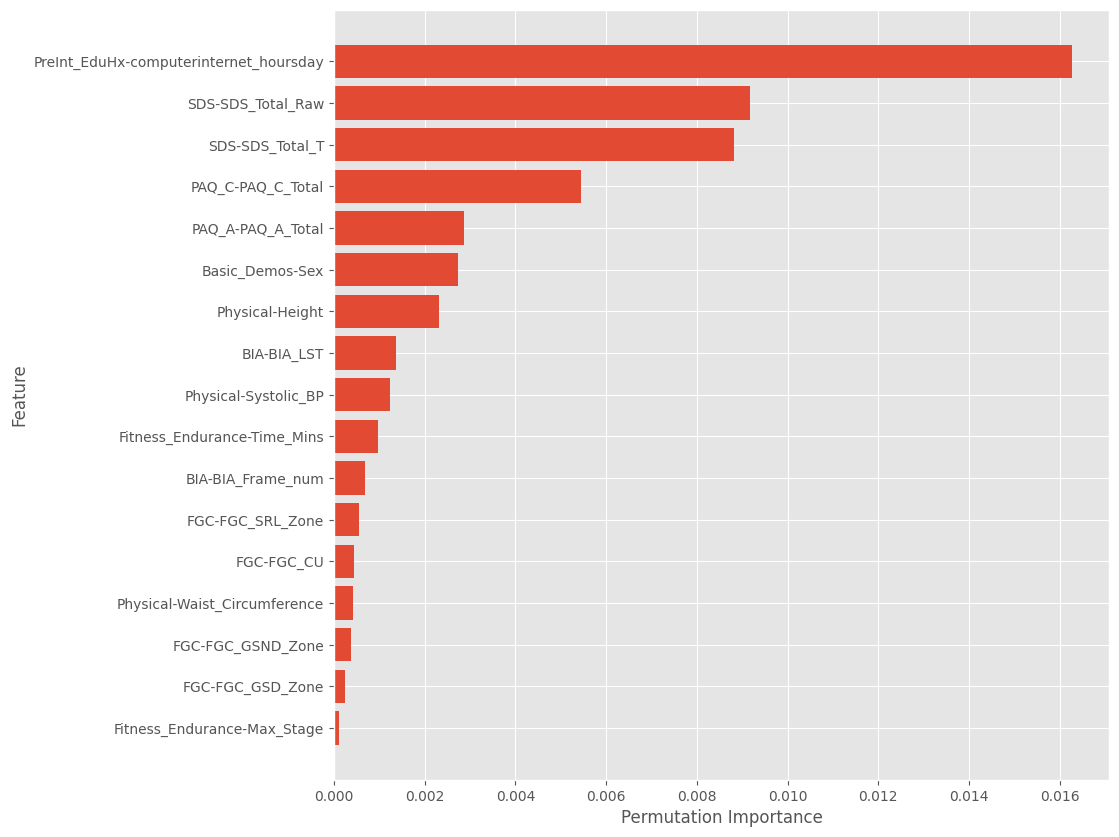

In [53]:
# plot importances as a bar chart
plt.figure(figsize=(10, 10))
sorting = np.argsort(importances)
plt.barh(X.columns[sorting][31:], importances[sorting][31:])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.show()